In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [72]:
data= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [73]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data=np.array(data)

train and dev set

In [87]:
m ,n = data.shape
np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

_,m_train = X_train.shape

X_train = X_train / 255.0  # Normalize to [0,1] range
X_dev = X_dev / 255.0


In [90]:
def init_params():
    'W1 = np.random.randn(10, 784) - 0.5'
    'W2 = np.random.randn(10, 10) - 0.5 Xavier Initialization'
    W1 = np.random.randn(10, 784) * np.sqrt(1 / 784)
    W2 = np.random.randn(10, 10) * np.sqrt(1 / 10)
    b1 = np.random.randn(10,1) - 0.5
    b2 = np.random.randn(10,1) - 0.5
    return W1 , b1 ,W2 , b2

In [91]:
def ReLU(Z):
    return np.maximum(Z ,0)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Numerical stability
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)   # Normalize along axis=0


def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1 ,A1 ,Z2 ,A2

In [92]:
'''def one_hot(Y):
    one_hot_Y = np.zeros(Y.size ,Y.max()+1)
    one_hot_Y[np.arange(Y.size ,Y)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y'''

'''def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))  # Correct shape (num_classes, num_samples)
    one_hot_Y[Y, np.arange(Y.size)] = 1  # Proper indexing
    return one_hot_Y'''
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1, Y.size))  # Create (classes, samples) shape
    one_hot_Y[Y, np.arange(Y.size)] = 1  # Correct indexing
    return one_hot_Y



def derv_ReLU(Z):
    return Z > 0
    
def backward_prop(Z1,A1,Z2,A2,W2,Y,X):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    m = Y.size
    dW2 = dZ2.dot(A2.T) / m
    db2 = np.sum(dZ2,axis=1, keepdims=True) / m
    dZ1 = W2.T.dot(dZ2) * derv_ReLU(Z1)
    dW1 = dZ1.dot(X.T) / m
    db1 = np.sum(dZ1 ,axis=1, keepdims=True) / m
    
    return dW1 , db1, dW2 ,db2

In [93]:
def update_params(W1,b1 ,W2, b2 ,dW1 ,db1 ,dW2 ,db2 ,alpha):
    W1 = W1 -alpha * dW1
    b1 = b1 -alpha * db2
    W2 = W2 -alpha * dW2
    b2 = b2 -alpha * db2
    return W1,b1 ,W2, b2 


highest prop among the rows of A2 final output class


In [94]:
def get_pred (A2):'highest prop among the rows of A2 final output class'
    return np.argmax(A2 ,0)

def get_acc (pred, Y):'sums all right pred and divide by total values'
    print(pred , Y)
    return np.sum(pred == Y) / Y.size
    
def gradiant_des(X ,Y ,iterations ,alpha):
    W1,b1 ,W2, b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2  =  forward_prop(W1,b1,W2,b2,X)
        dW1 , db1, dW2 ,db2 = backward_prop(Z1,A1,Z2,A2,W2,Y,X)
        W1,b1 ,W2, b2 = update_params(W1,b1 ,W2, b2 ,dW1 ,db1 ,dW2 ,db2 ,alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            pred = get_pred(A2)
            print("Accuracy: 0", get_acc(pred,Y))
    return W1 ,b1,W2,b2

In [95]:
W1 ,b1,W2,b2 = gradiant_des(X_train,Y_train,500,0.1)

Iteration:  0
[1 1 1 ... 1 1 1] [0 2 6 ... 3 0 7]
Accuracy: 0 0.11175609756097561
Iteration:  10
[1 1 1 ... 9 1 9] [0 2 6 ... 3 0 7]
Accuracy: 0 0.1954390243902439
Iteration:  20
[0 1 1 ... 0 1 9] [0 2 6 ... 3 0 7]
Accuracy: 0 0.27595121951219515
Iteration:  30
[0 1 1 ... 0 0 9] [0 2 6 ... 3 0 7]
Accuracy: 0 0.29629268292682925
Iteration:  40
[0 1 1 ... 5 0 9] [0 2 6 ... 3 0 7]
Accuracy: 0 0.35209756097560974
Iteration:  50
[0 6 1 ... 5 0 9] [0 2 6 ... 3 0 7]
Accuracy: 0 0.4210731707317073
Iteration:  60
[0 6 1 ... 3 0 9] [0 2 6 ... 3 0 7]
Accuracy: 0 0.4851463414634146
Iteration:  70
[0 6 1 ... 3 0 7] [0 2 6 ... 3 0 7]
Accuracy: 0 0.5381707317073171
Iteration:  80
[0 6 1 ... 3 0 7] [0 2 6 ... 3 0 7]
Accuracy: 0 0.5801219512195122
Iteration:  90
[0 6 1 ... 3 0 7] [0 2 6 ... 3 0 7]
Accuracy: 0 0.609390243902439
Iteration:  100
[0 6 1 ... 3 0 7] [0 2 6 ... 3 0 7]
Accuracy: 0 0.630780487804878
Iteration:  110
[0 6 6 ... 3 0 7] [0 2 6 ... 3 0 7]
Accuracy: 0 0.6480243902439025
Iteration:  1

In [96]:
def make_pred(X, W1 ,b1, W2 , b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    pred = get_pred(A2)
    return pred

def test_pred(index,W1,b1,W2,b2):
    current_image=X_train[:, index, None]
    pred = make_pred(X_train[:, index, None],W1 ,b1, W2 , b2)
    label = Y_train[index]
    print("Prediction: ",pred)
    print("Label: ",label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image ,interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


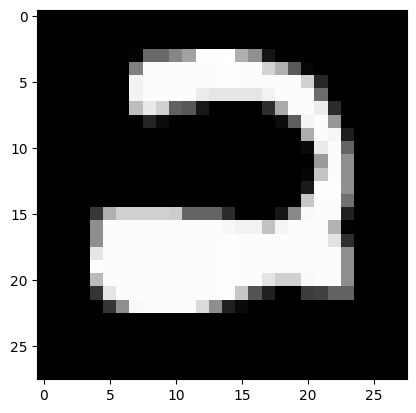

In [99]:
test_pred(90,W1,b1,W2,b2)

In [98]:
dev_pred = make_pred(X_dev ,W1, b1,W2,b2)
get_acc(dev_pred , Y_dev)

[3 0 5 4 3 0 9 8 0 7 5 8 0 3 6 7 6 2 6 8 8 8 4 8 9 5 3 4 6 3 0 9 8 4 4 5 5
 9 3 9 7 4 4 4 2 8 2 3 4 7 3 4 0 1 6 0 2 5 1 3 8 1 9 1 9 8 1 9 2 1 1 7 7 0
 1 0 9 0 4 9 3 4 7 9 2 1 2 9 2 7 9 2 6 8 3 9 9 3 9 9 3 4 5 0 4 9 7 7 9 4 7
 5 0 2 4 8 0 7 3 4 6 1 4 6 7 4 0 0 8 1 7 0 9 3 7 1 4 2 2 6 3 0 9 0 3 3 1 7
 9 7 4 7 7 7 8 7 4 9 8 8 9 4 2 3 1 1 3 6 5 8 6 1 1 6 8 8 8 5 9 0 7 0 7 8 8
 7 6 8 9 9 0 9 6 8 1 9 9 3 2 7 3 9 9 2 2 7 8 7 6 7 5 4 8 6 9 0 4 3 8 4 2 8
 9 4 9 4 8 1 9 4 1 2 7 9 8 9 9 3 8 9 3 0 8 7 7 6 1 9 2 6 1 1 6 1 2 6 0 1 9
 1 7 3 2 8 6 6 4 6 1 3 7 9 9 7 0 1 1 3 2 8 8 2 5 2 2 8 9 8 6 4 4 3 2 7 0 3
 8 0 1 4 9 1 4 1 7 6 7 7 8 2 3 4 7 0 6 8 0 7 9 9 5 1 3 8 6 0 6 1 9 6 4 6 8
 1 1 5 5 6 4 9 6 3 1 0 3 3 0 1 4 4 0 2 8 0 2 8 8 7 0 1 5 3 6 2 6 0 6 6 3 2
 8 9 4 5 2 7 2 1 4 9 7 2 7 0 1 3 6 1 9 0 3 0 3 0 1 8 0 3 9 4 6 8 9 2 5 3 4
 3 1 7 2 4 8 8 7 7 2 6 4 4 3 7 6 4 3 9 4 8 4 8 0 8 0 1 9 3 3 1 3 8 1 3 2 1
 4 1 4 9 4 4 1 3 2 9 1 2 9 1 2 8 4 5 6 9 9 7 6 9 8 7 1 4 4 1 1 3 6 5 7 0 9
 0 1 1 7 0 6 5 0 2 6 1 0 

0.774